In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from random import sample
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import ExtraTreesRegressor as etr
from sklearn.ensemble import GradientBoostingRegressor as gbr
from sklearn.ensemble import AdaBoostRegressor as abr
from sklearn.tree import DecisionTreeRegressor as dtr
import matplotlib.pyplot as plt
import csv
from sklearn import cross_validation
from sklearn.metrics import explained_variance_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold
import klepto

In [2]:
# read in your validation dataset which has never been seen by rfr model - NOTE in this example I am just reading the same data used to train the model

df = pd.read_csv('C:/Users/grants/code/old_growth/sen2_l8/zonal_stats/s2_10m_combined/sent2_val_data_10m_f.csv', header=0)
print (df.shape)

(37000, 143)


In [3]:
xdata2 = df[['NDRE1d', 'ratio63a', 'ratio62a', 'CVIa', 'GNDVIa', 'NDRE2a','CVId', 'ratio95d', 'psB9d', 'ratio98a', 
             'ratio62d','ratio54d','ratio92a', 'psB3d', 'ratio105a', 'SAVIa', 'psB10a', 'NDIId','psB2a', 'ratio103d', 
             'ratio107d', 'ratio103a', 'ratio109d', 'NDGId']].astype('int32')

ydata1 = df[['perc99_1']].astype('float32')

ydata2 = ydata1.values

ydata = ydata2.ravel()

print (len(ydata1))

37000


Predicted data r2 = 0.769081378443
MSE = 9.558
RMSE = 3.092
explained_var = 0.769
bias = -0.002
n = 37000


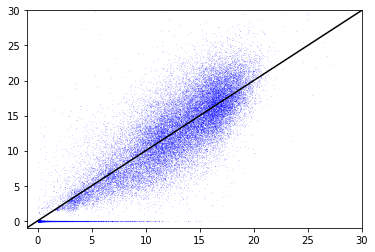

In [4]:
d = klepto.archives.file_archive('G:/SENTINEL-2_10m_DATA/s2_10m_final_models/h99_10m/rfrLCHM_s2_10m_99perc_20190219_512_n24', serialized=True)
d.load('model')
    
smodel = d['model']
    


predicted = smodel.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print ('Predicted data r2 =', smodel.score(xdata2, ydata))
print ('MSE =', format(np.mean((ydata - smodel.predict(xdata2))** 2), '.3f'))
print ('RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f'))
print ('explained_var =',format(explained_variance_score(ydata, predicted),  '.3f'))
print ('bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f'))
print ('n =' , len(ydata))


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
#fig.savefig('predicted_Observed_Validation_99th_l8.png',dpi=600)
plt.show()

d.clear()

In [5]:
# produce a dataframe with the predicted and observed results and change the column header names and export the results to a new csv file
results = pd.concat([pd.DataFrame(predicted), pd.DataFrame(ydata)], axis=1)
results.columns=['predicted','observed']
results.to_csv('s2_10m_h99_predicted_observed_n24.csv')